In [409]:
import seaborn as sns
import numpy as np 
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy import *

import scipy

In [420]:
# Constant Parameters

M_heatAir = 3600                            # Constant rate of air mass passing through the heater [kg/hour]
m_heatAir = 1470                            # Mass of air in the room or heater (kg)
C_air = 1005.4                              # Specific heat capacity Joule/Kg

R_wall = 1.599e-9; R_window = 5.935e-7      # Thermal Resistance of Walls and Windows

R = R_wall*R_window/(R_wall + R_window)
R = 4.329e-7

Room_Temp_Init = 22
T_Heater = 50                               # Maximum Temperature of 50 C

Temp_Set = 25

3600
3600


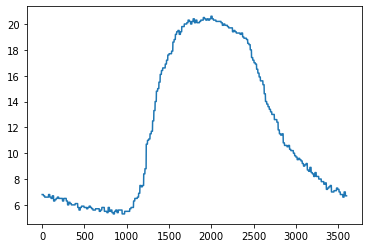

In [427]:
n = 60
time_range = np.linspace(0,n, n*60)                      # time range of usual Class 120 min

Subject_train = pd.read_csv('C:/Users/Mohamed/OneDrive - Worcester Polytechnic Institute (wpi.edu)/CS 539 Project/Outside_Temp.csv')

Temperature_Outside = []

for i in  range(0, len(Subject_train)):

    t = Subject_train['Outside Temperature (degree Celsius)'][i]

    for j in range(0,15):
        Temperature_Outside.append(t)

plt.plot(Temperature_Outside)

# plt.plot(Temperature_Outside)

Room_Temp_Init = 15

Room_Temperature_Log = np.zeros((len(time_range),))       # Temperature of Assigned time range, we measure temperature every 1 min
Room_Temperature_Log[0] = Room_Temp_Init

Room_Variation_Log = np.zeros((len(time_range),))         # Tempearture Variation Log
Room_Variation_Log[0] = 0

dQ_gain_Log = np.zeros((len(time_range), 1))                # Heat Gain from Heater Log
dQ_loss_Log = np.zeros((len(time_range), 1))                # Heat Loss from Room and Windoqs Log

State_log = np.zeros((len(time_range), 1)) 

print(len(time_range))
print(len(Temperature_Outside))

In [422]:
# Location of Heater is Considered to be 4 at each corner of the room

def Smart_Thermostat(Set_Temp, Room_Temp):
    T_diff = Set_Temp - Room_Temp

    State = 0 if abs(T_diff) < 1.5 else 1

    return State

def Heater_Gain(M_hearAir, C_air, T_heater, T_room, State):

    dQ_gain = M_hearAir*C_air*(T_heater - T_room)*State

    return dQ_gain

def Heat_Loss(T_room, T_outside, R):

    dQ_loss = (T_room - T_outside)/R

    return dQ_loss

def Room_Variation(dQ_gain,  dQ_loss, m_room, C_air):
    
    K = m_room * C_air
    dT_room = (dQ_gain - dQ_loss)
    dT_room = dT_room / K

    return dT_room


def Room_Temperature(Room_Temperature, Room_Temperature_Variation,  time_Stamp, state):
    dT = Room_Temperature_Variation[state] - Room_Temperature_Variation[state -1]
    dt = (time_Stamp[state] - time_Stamp[state-1])
    Room_Temp = Room_Temperature[state - 1] 
    Room_Temp = Room_Temp + dt * dT / 2
    Room_Temp = Room_Temperature[state - 1] + (time_Stamp[state] - time_Stamp[state-1])*( Room_Temperature_Variation[state -1])
    # X = np.array([Room_Temperature_Variation[state - 1], Room_Temperature_Variation[state]])
    # Y = np.array([time_Stamp[state - 1], time_Stamp[state]])
    
    # Room_Temp = scipy.integrate.trapezoid(X, Y)
    
    return Room_Temp

In [428]:
# x = np.linspace(0, n, n*60)
# Temperature_Outside = 5*np.sin(x) + 16
# M_heatAir = 3600                            # Constant rate of air mass passing through the heater [kg/hour]

for i in range(0, len(time_range)-1):

    Temp_set = 19
    State = Smart_Thermostat(Temp_set, Room_Temperature_Log[i])
    State_log[i] = State

    dQ_gain = Heater_Gain(M_heatAir, C_air, T_Heater, Room_Temperature_Log[i], State)
    dQ_gain_Log[i] = dQ_gain
    
    dQ_loss = Heat_Loss(Room_Temperature_Log[i], Temperature_Outside[i], R)
    dQ_loss_Log[i] = dQ_loss
        
    Room_Var = Room_Variation(dQ_gain,  dQ_loss, m_heatAir, C_air)
    Room_Variation_Log[i+1] = Room_Var

    Room_Temperature_Log[i+1] = Room_Temperature(Room_Temperature_Log, Room_Variation_Log,  time_range, i+1)


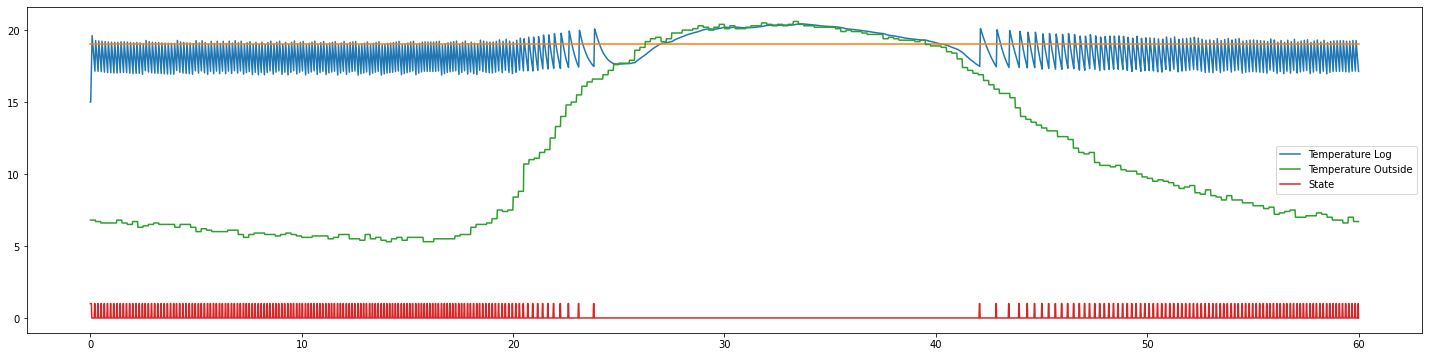

In [429]:
plt.figure(figsize = (25,6))
plt.plot(time_range, Room_Temperature_Log, label = 'Temperature Log')
plt.plot([0, 60], [Temp_set,Temp_set] )
plt.plot(time_range, Temperature_Outside, label = 'Temperature Outside')
plt.plot(time_range, State_log, label = 'State')

plt.legend()
# plt.plot(time_range, dQ_gain_Log/1e7)


# plt.plot(Room_Variation_Log)

# plt.xlim([0,10])

# plt.xlim([0,5])

In [ ]:
def Simulation_Room(Desired_Temp, Desired_Light, Desired_AirMvmt):

    Max_X = 6
    Max_Y = 3

    for i in range(0,4):

        Part_Temp =  Desired_Temp[i]
        Part_light = Desired_Light[i]
        PArt_Aitmvt = Desired_AirMvmt[i]




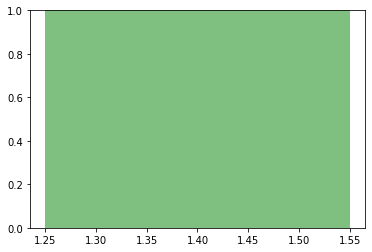

In [433]:
plt.axvspan(1.25, 1.55, ymin = 0, ymax = 1, facecolor='g', alpha=0.5)
plt.axvspan(1.25, 1.55, ymin = 1, ymax = 2, facecolor='g', alpha=0.5)

In [ ]:
Light_Options = [3000, 4000, 5000, 6000]
#Light vs Productivity Equation 'Prod = 0.002*Light + 64.05'  Light from 0 to 1500 lux
Air_Movement = []
def Profile_Change(profile, Ta, Light, Air_mvt):

    TC_input = Thermal_Comfort(profile, Ta)
    TC_pred = loaded_rf.predict(X_test)

    if (TC_pred <= 1) & () 

In [ ]:
Classes = ['anger', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'suprise']

In [1]:
plt.scatter(X_row, Y_row)
plt.axvspan(0, 3, ymin = 0, ymax = .5, facecolor='g', alpha=0.5)
plt.axvspan(0, 3, ymin = 0.5, ymax = 1, facecolor='r', alpha=0.5)
plt.axvspan(3, 6, ymin = 0, ymax = .5, facecolor='b', alpha=0.5)
plt.axvspan(3, 6, ymin = 0.5, ymax = 1, facecolor='g', alpha=0.5)

NameError: name 'plt' is not defined

In [ ]:
#B Future Work 

# Hidden Markov Model